# DB 불러오기 

In [2]:
import pandas as pd
import cx_Oracle

#한글 지원 방법
import os
os.putenv('NLS_LANG', '.UTF8')

#연결에 필요한 기본 정보 (유저, 비밀번호, 데이터베이스 서버 주소)
connection = cx_Oracle.connect('SCOTT','tiger','localhost:1521/orcl')

cursor = connection.cursor()

query = """
   select *
   from learningTbl"""

df = pd.read_sql(query, con=connection)

print(df)


      BUSI_PROFITS     NET_INCM      TTL_LIAB LIMIT INTEREST CREDIT_RNK
0      34220567788  33684171402   85257288089  None     None       None
1      -2503464690  -7860173438   79688488587  None     None       None
2       3101797972 -14302411054  563288377767  None     None       None
3        749075733  -3050740892   35885564229  None     None       None
4     -10856264040 -16460211054   53073686409  None     None       None
...            ...          ...           ...   ...      ...        ...
1206   12077076248   8440874428   27991148294  None     None       None
1207    -832293809  -4743617836   14949035492  None     None       None
1208   -3826239762  -5760304428   32373055780  None     None       None
1209    3873437545   2686752710     969496543  None     None       None
1210    3660817248   3900832471   11705673344  None     None       None

[1211 rows x 6 columns]


# 신용등급 데이터 만들기

In [4]:
import numpy as np

for i in range(len(df['CREDIT_RNK'])):
    # 평균 5, 표준편차 1.4를 만족하는 정규분포에서 랜덤하게 하나 뽑아 버림 후 데이터에 입력 
    rand_norm = np.random.normal(5, 1.4, size=1)
    credit = int(rand_norm)
    if credit <= 0 or credit >= 11:
        i = i - 1
    else :
        df['CREDIT_RNK'].loc[i] = credit


/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [47]:
print(df)

      BUSI_PROFITS     NET_INCM      TTL_LIAB  CREDIT_RNK  INTEREST  LIMIT
0      34220567788  33684171402   85257288089           5       4.0      4
1      -2503464690  -7860173438   79688488587           6       4.0      4
2       3101797972 -14302411054  563288377767           4       4.0      4
3        749075733  -3050740892   35885564229           5       4.0      4
4     -10856264040 -16460211054   53073686409           6       4.0      4
...            ...          ...           ...         ...       ...    ...
1206   12077076248   8440874428   27991148294           5       4.0      4
1207    -832293809  -4743617836   14949035492           6       4.0      4
1208   -3826239762  -5760304428   32373055780           5       4.0      4
1209    3873437545   2686752710     969496543           5       4.0      4
1210    3660817248   3900832471   11705673344           6       4.0      4

[1211 rows x 6 columns]


In [25]:
def get_infos(data):
    print('mean : ', data.mean())
    print('max : ', data.max())
    print('min : ', data.min())
    print('var : ', data.var())

(array([ 11.,  27.,  89., 170., 325., 159.,  80.,  41.,  26.,  19.]),
 array([-2.78898919, -2.19056474, -1.59214029, -0.99371584, -0.39529139,
         0.20313305,  0.8015575 ,  1.39998195,  1.9984064 ,  2.59683085,
         3.19525529]),
 <BarContainer object of 10 artists>)

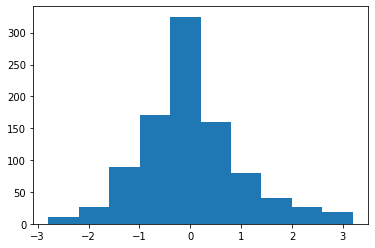

In [297]:
plt.hist(df3['BUSI_PROFITS'])

# 금리, 한도 계산하기 

In [6]:
df = df.fillna(4)
df.isnull().sum()

BUSI_PROFITS    0
NET_INCM        0
TTL_LIAB        0
LIMIT           0
INTEREST        0
CREDIT_RNK      0
dtype: int64

In [7]:
# ndarray(object) 를 int로 
df['LIMIT'] = df['LIMIT'].astype('int64')
df['INTEREST'] = df['INTEREST'].astype('float')
# 칼럼 순서바꾸기
df = df[['BUSI_PROFITS', 'NET_INCM', 'TTL_LIAB', 'CREDIT_RNK', 'INTEREST', 'LIMIT']]

# 머신러닝
## 1. 한번 돌려보기

In [8]:
# scikit-learn 버전체크
import sklearn
print(sklearn.__version__)

0.23.2


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline


In [165]:
df.head()

,BUSI_PROFITS,NET_INCM,TTL_LIAB,CREDIT_RNK,INTEREST,LIMIT
0,34220567788,33684171402,85257288089,2,2.71,517285000
1,-2503464690,-7860173438,79688488587,5,3.33,358025000
2,3101797972,-14302411054,563288377767,6,2.75,772250000
3,749075733,-3050740892,35885564229,4,2.72,767600000
4,-10856264040,-16460211054,53073686409,4,2.44,70500000


In [187]:
# 데이터 형태 확인해보기 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BUSI_PROFITS  1211 non-null   int64  
 1   NET_INCM      1211 non-null   int64  
 2   TTL_LIAB      1211 non-null   int64  
 3   CREDIT_RNK    1211 non-null   int64  
 4   INTEREST      1211 non-null   float64
 5   LIMIT         1211 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 56.9 KB


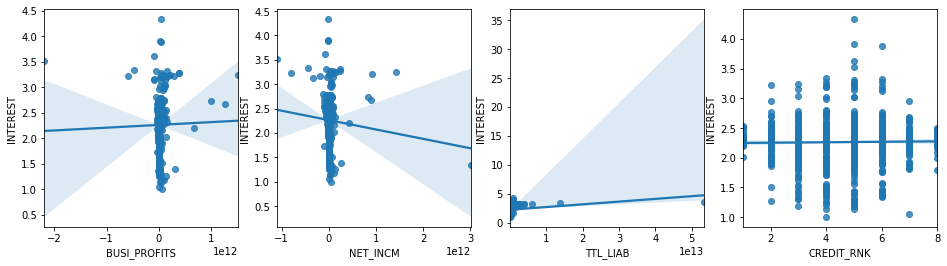

In [277]:
# 1개 행과 4개의 열을 가진 subplots를 이용. axs는 4x1개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 4), ncols=4, nrows=1, squeeze=False)
lm_features = ['BUSI_PROFITS', 'NET_INCM', 'TTL_LIAB', 'CREDIT_RNK']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현 
    sns.regplot(x=feature, y='INTEREST', data=df, ax=axs[row][col])

=> X 축이 모두 억단위어서 그래프가 잘 보이질 않으므로 피처 표준화 진행 (스케일링)
- 그전에 진행해야할것 : 이상치 제거 (그래프에 이상치가 몇몇 있는게 보임)

## 2. 이상치 제거

In [10]:
# IQR 기반 예제 코드
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound)) # Q1~Q3 사이에 없는 값의 인덱스를 반환

In [219]:
type(outliers_iqr(df['TTL_LIAB'])[0])


numpy.ndarray

In [236]:
print(outliers_iqr(df['BUSI_PROFITS']))

(array([   2,    8,   17,   19,   21,   29,   30,   38,   47,   48,   49,
         57,   59,   60,   81,   83,   88,   90,   92,   93,   95,  102,
        118,  131,  133,  141,  143,  151,  156,  163,  167,  236,  244,
        250,  251,  255,  256,  268,  270,  273,  280,  290,  294,  302,
        304,  319,  324,  331,  363,  377,  378,  386,  438,  448,  454,
        460,  461,  470,  475,  485,  493,  494,  504,  511,  512,  530,
        538,  552,  563,  627,  640,  668,  684,  697,  706,  716,  733,
        741,  742,  745,  752,  753,  764,  765,  772,  773,  776,  784,
        799,  807,  813,  815,  816,  818,  822,  830,  834,  839,  850,
        858,  871,  885,  899,  901,  902,  904,  927,  928,  937,  938,
        941,  951,  953,  964, 1008, 1029, 1030, 1041, 1055, 1058, 1065,
       1073, 1074, 1090, 1096, 1098, 1101, 1103, 1109, 1112, 1120, 1121,
       1130, 1131, 1147, 1150, 1158, 1160, 1171, 1172, 1180, 1187, 1203]),)


In [11]:
# 튜플형으로 반환됬기때문에 array를 꺼내서 리스트화 
outliers_iqr_list1 = outliers_iqr(df['BUSI_PROFITS'])[0].tolist()
outliers_iqr_list2 = outliers_iqr(df['NET_INCM'])[0].tolist()
outliers_iqr_list3 = outliers_iqr(df['TTL_LIAB'])[0].tolist()
outliers_iqr_all = outliers_iqr_list1 + outliers_iqr_list2 + outliers_iqr_list3
print(outliers_iqr_all)

[0, 17, 19, 21, 29, 40, 42, 46, 49, 63, 67, 81, 82, 83, 84, 91, 96, 102, 103, 105, 124, 137, 141, 143, 151, 163, 167, 169, 224, 229, 236, 238, 246, 248, 255, 256, 270, 280, 290, 294, 299, 302, 310, 311, 312, 315, 331, 337, 342, 343, 363, 376, 377, 378, 386, 424, 434, 442, 460, 465, 470, 479, 481, 485, 493, 494, 503, 511, 517, 521, 530, 538, 563, 588, 623, 627, 633, 640, 650, 654, 659, 666, 668, 680, 686, 687, 694, 702, 706, 716, 727, 730, 733, 742, 752, 753, 764, 768, 772, 776, 799, 813, 815, 816, 823, 834, 858, 860, 863, 886, 892, 896, 899, 902, 904, 906, 907, 917, 922, 928, 932, 936, 937, 938, 939, 958, 974, 982, 1008, 1025, 1029, 1030, 1038, 1041, 1055, 1058, 1059, 1065, 1068, 1074, 1088, 1090, 1096, 1098, 1109, 1110, 1120, 1121, 1123, 1124, 1131, 1147, 1150, 1158, 1160, 1167, 1180, 1184, 0, 9, 17, 18, 19, 21, 29, 36, 46, 49, 63, 64, 67, 72, 81, 82, 84, 91, 96, 99, 102, 105, 124, 137, 143, 144, 146, 151, 163, 167, 189, 229, 242, 246, 248, 251, 255, 263, 265, 270, 277, 280, 299, 302,

In [12]:
# 중복 행이 섞였으니 중복제거
new_outliers_list = []
for v in outliers_iqr_all:
    if v not in new_outliers_list:
        new_outliers_list.append(v)
print(new_outliers_list)

[0, 17, 19, 21, 29, 40, 42, 46, 49, 63, 67, 81, 82, 83, 84, 91, 96, 102, 103, 105, 124, 137, 141, 143, 151, 163, 167, 169, 224, 229, 236, 238, 246, 248, 255, 256, 270, 280, 290, 294, 299, 302, 310, 311, 312, 315, 331, 337, 342, 343, 363, 376, 377, 378, 386, 424, 434, 442, 460, 465, 470, 479, 481, 485, 493, 494, 503, 511, 517, 521, 530, 538, 563, 588, 623, 627, 633, 640, 650, 654, 659, 666, 668, 680, 686, 687, 694, 702, 706, 716, 727, 730, 733, 742, 752, 753, 764, 768, 772, 776, 799, 813, 815, 816, 823, 834, 858, 860, 863, 886, 892, 896, 899, 902, 904, 906, 907, 917, 922, 928, 932, 936, 937, 938, 939, 958, 974, 982, 1008, 1025, 1029, 1030, 1038, 1041, 1055, 1058, 1059, 1065, 1068, 1074, 1088, 1090, 1096, 1098, 1109, 1110, 1120, 1121, 1123, 1124, 1131, 1147, 1150, 1158, 1160, 1167, 1180, 1184, 9, 18, 36, 64, 72, 99, 144, 146, 189, 242, 251, 263, 265, 277, 327, 333, 354, 384, 414, 524, 592, 625, 718, 731, 755, 757, 765, 779, 797, 807, 814, 822, 830, 844, 850, 893, 900, 924, 926, 927, 951,

In [13]:
df2 = df.drop(new_outliers_list)

In [49]:
df2 = df2.reset_index(drop=True)
df2.shape

(947, 5)

In [39]:
df2 = df2.drop(['LIMIT'], axis=1)

In [50]:
df2

,BUSI_PROFITS,NET_INCM,TTL_LIAB,CREDIT_RNK,INTEREST
0,-2503464690,-7860173438,79688488587,6,2.12
1,749075733,-3050740892,35885564229,5,2.82
2,-10856264040,-16460211054,53073686409,6,3.71
3,15643111979,10043081605,163407757739,5,2.34
4,2404719067,-3466383293,166348934195,6,1.59
...,...,...,...,...,...
942,12077076248,8440874428,27991148294,5,NaN
943,-832293809,-4743617836,14949035492,6,NaN
944,-3826239762,-5760304428,32373055780,5,NaN
945,3873437545,2686752710,969496543,5,NaN


## 3-1. 피처 표준화
= 분산스케일링 : 평균이 0이고 분산이 1이 되도록 스케일링하는 방법 

In [282]:
from sklearn.preprocessing import StandardScaler
# 레이블을 빼고 표준화할 데이터프레임 생성
df3 = df2.drop(['INTEREST', 'LIMIT', 'CREDIT_RNK'], axis=1)
scaler = StandardScaler()
df3 = scaler.fit_transform(df3)

In [283]:
print(df3)

[[-0.73161632 -1.04066071  1.02074402]
 [-0.27062498 -0.46787028 -0.11370952]
 [-1.91548114 -2.06490197  0.33144629]
 ...
 [-0.91909681 -0.79057198 -0.20468011]
 [ 0.17219926  0.21544972 -1.01800204]
 [ 0.14206401  0.36004334 -0.7399454 ]]


In [284]:
#transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DF로 변환
df3 = pd.DataFrame(data=df3, columns=['BUSI_PROFITS', 'NET_INCM', 'TTL_LIAB'])

In [285]:
df3

,BUSI_PROFITS,NET_INCM,TTL_LIAB
0,-0.731616,-1.040661,1.020744
1,-0.270625,-0.467870,-0.113710
2,-1.915481,-2.064902,0.331446
3,1.840347,1.091569,3.188992
4,-0.035966,-0.517372,3.265166
...,...,...,...
942,1.334923,0.900750,-0.318167
943,-0.494757,-0.669487,-0.655945
944,-0.919097,-0.790572,-0.204680
945,0.172199,0.215450,-1.018002


## 3-2. min-max 스케일링
= 모든 피처의 값을 [0, 1] 범위의 값으로 압축시키거나 확장

In [15]:
from sklearn.preprocessing import MinMaxScaler
# 레이블을 빼고 표준화할 데이터프레임 생성
df3 = df2.drop(['INTEREST', 'LIMIT', 'CREDIT_RNK'], axis=1)
scaler = MinMaxScaler(feature_range=(0,1))
df3 = scaler.fit_transform(df3)
print(df3)

[[0.34379826 0.32319905 0.4336165 ]
 [0.42083244 0.42113491 0.19519528]
 [0.14596798 0.14807401 0.28875098]
 ...
 [0.31246925 0.36595929 0.17607655]
 [0.49483079 0.53796914 0.00514561]
 [0.48979503 0.56269179 0.06358309]]


In [16]:
#transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DF로 변환
df3 = pd.DataFrame(data=df3, columns=['BUSI_PROFITS', 'NET_INCM', 'TTL_LIAB'])

In [51]:
df3

,BUSI_PROFITS,NET_INCM,TTL_LIAB,CREDIT_RNK,INTEREST
0,0.343798,0.323199,0.433617,5,2.62
1,0.420832,0.421135,0.195195,6,2.12
2,0.145968,0.148074,0.288751,4,2.59
3,0.773587,0.687768,0.889304,5,2.82
4,0.460045,0.412671,0.905313,6,3.71
...,...,...,...,...,...
942,0.689128,0.655142,0.152226,6,1.75
943,0.383379,0.386662,0.081237,5,1.90
944,0.312469,0.365959,0.176077,4,1.97
945,0.494831,0.537969,0.005146,3,1.42


In [18]:
# 스케일링한 df3에 레이블과 신용등급 붙이기
credit_rnk_col = df['CREDIT_RNK']
interest_col = df['INTEREST']
limit_col = df['LIMIT']
df3['CREDIT_RNK'] = credit_rnk_col
df3['INTEREST'] = interest_col
df3['LIMIT'] = limit_col

In [385]:
df3

,BUSI_PROFITS,NET_INCM,TTL_LIAB,CREDIT_RNK,INTEREST,LIMIT
0,0.343798,0.323199,0.433617,2,2.33,866955000
1,0.420832,0.421135,0.195195,5,2.33,848025000
2,0.145968,0.148074,0.288751,6,2.74,450450000
3,0.773587,0.687768,0.889304,4,2.39,993610000
4,0.460045,0.412671,0.905313,4,2.33,436100000
...,...,...,...,...,...,...
942,0.689128,0.655142,0.152226,4,2.37,849355000
943,0.383379,0.386662,0.081237,4,1.99,420090000
944,0.312469,0.365959,0.176077,3,2.32,706280000
945,0.494831,0.537969,0.005146,4,2.35,434800000


=> 다시 회귀곡선 결과 확인 

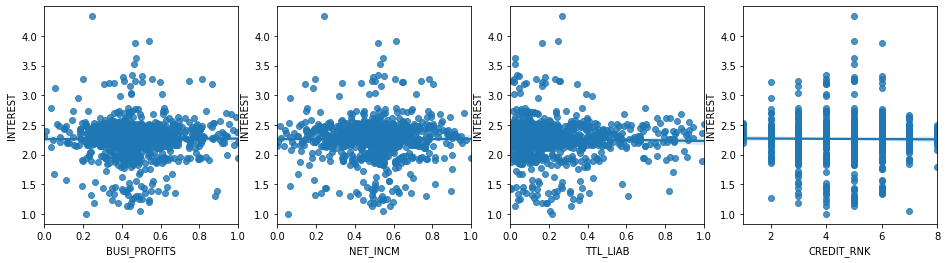

In [330]:
# 1개 행과 4개의 열을 가진 subplots를 이용. axs는 4x1개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 4), ncols=4, nrows=1, squeeze=False)
lm_features = ['BUSI_PROFITS', 'NET_INCM', 'TTL_LIAB', 'CREDIT_RNK']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현 
    sns.regplot(x=feature, y='INTEREST', data=df3, ax=axs[row][col])

## 4. 금리, 한도를 표준화한 데이터로 다시 만들기

(array([ 11.,  27.,  89., 170., 325., 159.,  80.,  41.,  26.,  19.]),
 array([-2.78898919, -2.19056474, -1.59214029, -0.99371584, -0.39529139,
         0.20313305,  0.8015575 ,  1.39998195,  1.9984064 ,  2.59683085,
         3.19525529]),
 <BarContainer object of 10 artists>)

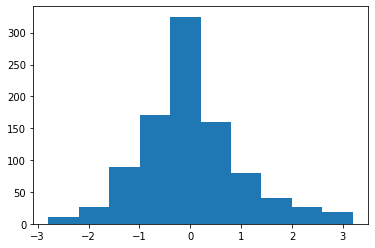

In [298]:
plt.hist(df3['BUSI_PROFITS'])

(array([340., 234., 142.,  83.,  50.,  27.,  24.,  15.,  21.,  11.]),
 array([-1.04248582, -0.56666679, -0.09084776,  0.38497127,  0.8607903 ,
         1.33660933,  1.81242836,  2.28824739,  2.76406642,  3.23988545,
         3.71570448]),
 <BarContainer object of 10 artists>)

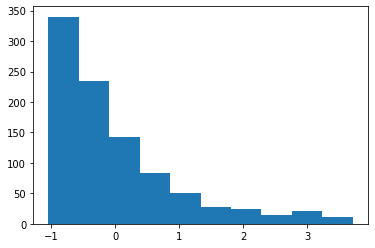

In [299]:
plt.hist(df3['TTL_LIAB'])

(array([ 16.,  38.,  67., 104., 199., 292., 132.,  59.,  26.,  14.]),
 array([-2.93093184, -2.346069  , -1.76120617, -1.17634333, -0.5914805 ,
        -0.00661766,  0.57824517,  1.16310801,  1.74797084,  2.33283368,
         2.91769651]),
 <BarContainer object of 10 artists>)

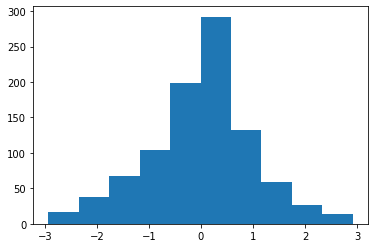

In [301]:
plt.hist(df3['NET_INCM'])

(array([933.,  13.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ -89.33028417,   33.29094008,  155.91216433,  278.53338857,
         401.15461282,  523.77583707,  646.39706131,  769.01828556,
         891.63950981, 1014.26073406, 1136.8819583 ]),
 <BarContainer object of 10 artists>)

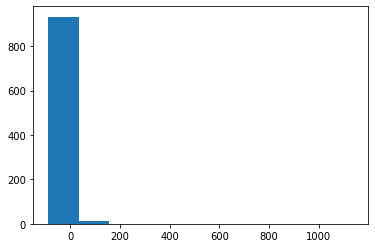

In [303]:
plt.hist(df3['NET_INCM'] / df3['TTL_LIAB'])

In [437]:
for i in range(len(df3)):
    interest = 3 * df3['TTL_LIAB'].loc[i] / df3['NET_INCM'].loc[i] + (df3['CREDIT_RNK'].loc[i] / 10)
    limit = 5 * df3['NET_INCM'].loc[i] / df3['TTL_LIAB'].loc[i] - (df3['CREDIT_RNK'].loc[i] / 5)
    
    print('이익 : ', df3['NET_INCM'].loc[i])
    print('부채 : ', df3['TTL_LIAB'].loc[i])
    print('금리 : ', interest)
    print('한도 : ', limit)

    df3['LIMIT'].loc[i] = np.round(limit, 3) * 10000000
    df3['INTEREST'].loc[i] = round(interest, 2)
    
    print('최종 한도 :', df3['LIMIT'].loc[i])
# ndarray(object) 를 int로 
df['LIMIT'] = df['LIMIT'].astype('int64')
df['INTEREST'] = df['INTEREST'].astype('float')

이익 :  0.32319905053438946
부채 :  0.4336165044510876
금리 :  4.224917496516124
한도 :  3.326784465267588
최종 한도 : 33270000.0
이익 :  0.4211349076882914
부채 :  0.1951952830051512
금리 :  1.890494680742264
한도 :  9.787527782553477
최종 한도 : 97880000.0
이익 :  0.14807401292901534
부채 :  0.28875097921905357
금리 :  6.450134811112538
한도 :  1.3640434766574898
최종 한도 : 13640000.000000002
이익 :  0.6877681783287694
부채 :  0.8893041258218614
금리 :  4.27908667706673
한도 :  3.06688961829093
최종 한도 : 30670000.0
이익 :  0.41267106202207116
부채 :  0.9053130771283163
금리 :  6.981365841542073
한도 :  1.4791621619510773
최종 한도 : 14790000.0
이익 :  0.5904956090168207
부채 :  0.5599325470243453
금리 :  3.2447250333832462
한도 :  4.472917355446626
최종 한도 : 44730000.0
이익 :  0.893203414712895
부채 :  0.24170597659409584
금리 :  1.2118172387589499
한도 :  17.677065137137227
최종 한도 : 176770000.0
이익 :  0.5084805844208226
부채 :  0.5781787197107565
금리 :  3.9112141392929836
한도 :  3.3972613232392774
최종 한도 : 33970000.0
이익 :  0.8290108245655654
부채 :  0.8799493121630

/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-437-5f3ca4307141>:3: RuntimeWarning: divide by zero encountered in double_scalars
  limit = 5 * df3['NET_INCM'].loc[i] / df3['TTL_LIAB'].loc[i] - (df3['CREDIT_RNK'].loc[i] / 5)


 203570000.0
이익 :  0.5997100782617751
부채 :  0.061510903480293935
금리 :  0.8077032004793703
한도 :  47.74827423514454
최종 한도 : 477480000.0
이익 :  0.39823726610152504
부채 :  0.13194587304041328
금리 :  1.4939743284103566
한도 :  14.090933006277135
최종 한도 : 140910000.0
이익 :  0.5121690294097027
부채 :  0.03528107097724513
금리 :  0.8066568004975317
한도 :  71.38411029246123
최종 한도 : 713840000.0
이익 :  0.4986871008395366
부채 :  0.21799284078056563
금리 :  1.9114005179615199
한도 :  10.2381531763587
최종 한도 : 102380000.0
이익 :  0.5451284731650298
부채 :  0.1455391076693215
금리 :  1.4009438957993758
한도 :  17.527903513178494
최종 한도 : 175280000.0
이익 :  0.7707124688791954
부채 :  0.1385730951428589
금리 :  0.9393960811781524
한도 :  27.008878342677065
최종 한도 : 270090000.0
이익 :  0.4919608154301742
부채 :  0.004085440488481767
금리 :  0.42491320666408827
한도 :  601.2902970159246
최종 한도 : 6012900000.0
이익 :  0.48553447037018405
부채 :  0.018269792730010153
금리 :  0.41288462824944716
한도 :  132.2790308531087
최종 한도 : 1322790000.0
이익 :  0.5332351692

금리 :  2.0210080374286794
한도 :  9.95496497750101
최종 한도 : 99550000.0
이익 :  0.5561516594663359
부채 :  0.28743215727879623
금리 :  1.8504700150743394
한도 :  9.074485707020143
최종 한도 : 90740000.0
이익 :  0.49336570591454454
부채 :  0.12616420668208217
금리 :  0.9671644289597316
한도 :  19.152522814880598
최종 한도 : 191530000.0
이익 :  0.34001159232305855
부채 :  0.8029427179672182
금리 :  7.284547139830842
한도 :  1.7172842390541505
최종 한도 : 17170000.0
이익 :  0.17666191913108464
부채 :  0.20307045956894876
금리 :  4.148458964463113
한도 :  2.9497690285942944
최종 한도 : 29500000.0
이익 :  0.4008713050579592
부채 :  0.15557021648035485
금리 :  1.3642406017901083
한도 :  12.483934795725522
최종 한도 : 124840000.0
이익 :  0.36975855937210267
부채 :  0.29640761682545663
금리 :  2.9048742833333843
한도 :  5.2373322813401195
최종 한도 : 52370000.0
이익 :  0.4672523823789688
부채 :  0.040458109022224055
금리 :  0.7597618153356585
한도 :  56.745207780509745
최종 한도 : 567450000.0
이익 :  0.42772579770156316
부채 :  0.0791290724310138
금리 :  0.7549985962237271
한도 :  26.6270

최종 한도 : 1739740000.0
이익 :  0.5996479457381775
부채 :  0.5423104116843035
금리 :  3.5131440149438493
한도 :  3.9286412801461394
최종 한도 : 39290000.0
이익 :  0.781575409853901
부채 :  0.46604512709520757
금리 :  2.288868180419052
한도 :  7.385190236033026
최종 한도 : 73850000.0
이익 :  0.5564200443361113
부채 :  0.030778013598943103
금리 :  0.7659430528010489
한도 :  89.19245540446742
최종 한도 : 891919999.9999999
이익 :  0.43609246253135475
부채 :  0.010136572589938145
금리 :  0.46973227098055614
한도 :  214.30843959438158
최종 한도 : 2143080000.0
이익 :  0.7611633229986905
부채 :  0.072183774680153
금리 :  0.9845004711831491
한도 :  51.32399000824026
최종 한도 : 513240000.0
이익 :  0.5332257218088434
부채 :  0.15873820055819113
금리 :  1.2930825768478065
한도 :  15.995759304748155
최종 한도 : 159960000.0
이익 :  0.665801228370908
부채 :  0.07578414860665166
금리 :  0.6414719530876267
한도 :  43.32747300142328
최종 한도 : 433270000.0
이익 :  0.5027605987933945
부채 :  0.0868533096545413
금리 :  1.2182584506203495
한도 :  27.54308810989028
최종 한도 : 275430000.0
이익 :  0.544351

최종 한도 : 211820000.0
이익 :  0.5079103029006548
부채 :  0.06313200985820996
금리 :  1.0728926711921316
한도 :  38.82605204882479
최종 한도 : 388260000.0
이익 :  0.4746168561680508
부채 :  0.023751623639231518
금리 :  0.5501313533046219
한도 :  99.11250774622981
최종 한도 : 991130000.0
이익 :  0.45601581501292265
부채 :  0.16273882296026218
금리 :  1.4706130200044738
한도 :  13.210664656345502
최종 한도 : 132110000.0
이익 :  0.7760608723042515
부채 :  0.5452469933852999
금리 :  2.7077482946654916
한도 :  5.916599281785002
최종 한도 : 59170000.0
이익 :  0.6151493954554151
부채 :  0.03824083158493921
금리 :  0.5864953385346089
한도 :  79.63096475152045
최종 한도 : 796310000.0
이익 :  0.6173288234708876
부채 :  0.04967781258755291
금리 :  0.7414166196302463
한도 :  61.13325338982047
최종 한도 : 611330000.0
이익 :  0.5843667146295957
부채 :  0.4460702908846717
금리 :  2.790018988337226
한도 :  5.550164027631684
최종 한도 : 55500000.0
이익 :  0.49085666202915884
부채 :  0.1052159303829748
금리 :  0.9430549192182984
한도 :  22.726156991745107
최종 한도 : 227260000.0
이익 :  0.5115706086772

부채 :  0.1958109923970351
금리 :  1.007432026477459
한도 :  20.60345056286188
최종 한도 : 206030000.00000003
이익 :  0.3323218176650261
부채 :  0.33175451088663976
금리 :  3.794878698163373
한도 :  3.40855009894018
최종 한도 : 34090000.0
이익 :  0.7824474903621348
부채 :  0.6679887984327557
금리 :  2.9611512848878654
한도 :  5.05674110252989
최종 한도 : 50570000.00000001
이익 :  0.2572186137861417
부채 :  0.04890912229498292
금리 :  1.0704383704009142
한도 :  25.295566319386506
최종 한도 : 252960000.0
이익 :  0.5886722198249964
부채 :  0.8304879183585553
금리 :  4.632344709278692
한도 :  2.744134759892092
최종 한도 : 27440000.000000004
이익 :  0.5242420408997749
부채 :  0.09737752990568167
금리 :  0.8572475439315161
한도 :  26.31801904441134
최종 한도 : 263180000.0
이익 :  0.3371351434989878
부채 :  0.02096067814846646
금리 :  0.586518776395639
한도 :  79.62085783461484
최종 한도 : 796210000.0
이익 :  0.5057196873969024
부채 :  0.09528055939963233
금리 :  0.9652176202002608
한도 :  25.738450791193294
최종 한도 : 257380000.0
이익 :  0.19549207421006587
부채 :  0.11481803121711531
금

KeyError: 595

In [26]:
get_infos(df3['INTEREST'])

mean :  1.9324604012671593
max :  4.63
min :  1.15
var :  0.19210313664381345


In [391]:
df3.tail(30)

,BUSI_PROFITS,NET_INCM,TTL_LIAB,CREDIT_RNK,INTEREST,LIMIT
917,0.442864,0.582444,0.312487,5,1.94,1.965800e+08
918,0.422344,0.337025,0.112998,6,1.41,3.085200e+08
919,0.256762,0.061515,0.057188,4,3.06,1.125200e+08
920,0.431862,0.602601,0.083456,4,0.68,7.361300e+08
921,0.616935,0.630525,0.120861,7,1.04,5.288100e+08
922,0.445311,0.515089,0.197130,5,1.48,2.740900e+08
923,0.287949,0.347812,0.505372,4,4.63,8.243000e+07
924,0.432725,0.517576,0.186629,5,1.42,2.916400e+08
925,0.403843,0.331340,0.583622,5,5.62,6.514000e+07
926,0.402472,0.484805,0.004384,6,0.43,1.107082e+10


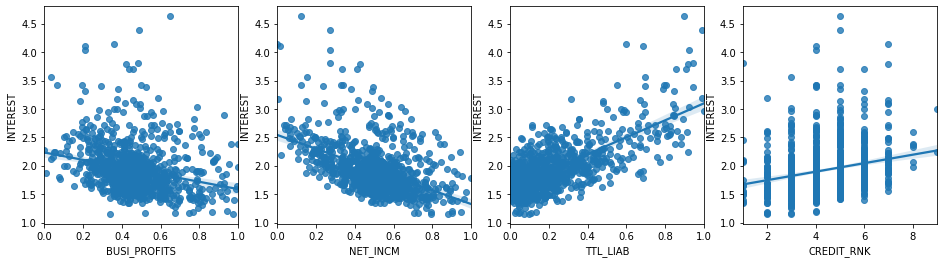

In [27]:
# 금리가 10% 이하, 한도 100억 미만인것만 남기기 
df4 = df3[df3.INTEREST < 10]
df4 = df3[df3.LIMIT < 10000000000]

# 1개 행과 4개의 열을 가진 subplots를 이용. axs는 4x1개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 4), ncols=4, nrows=1, squeeze=False)
lm_features = ['BUSI_PROFITS', 'NET_INCM', 'TTL_LIAB', 'CREDIT_RNK']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현 
    sns.regplot(x=feature, y='INTEREST', data=df4, ax=axs[row][col])

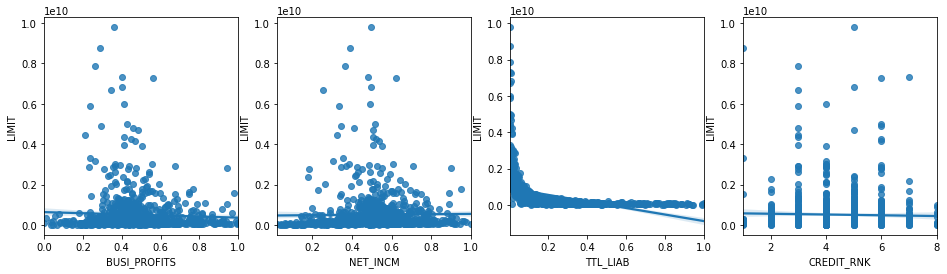

In [439]:
# 1개 행과 4개의 열을 가진 subplots를 이용. axs는 4x1개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 4), ncols=4, nrows=1, squeeze=False)
lm_features = ['BUSI_PROFITS', 'NET_INCM', 'TTL_LIAB', 'CREDIT_RNK']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현 
    sns.regplot(x=feature, y='LIMIT', data=df4, ax=axs[row][col])

### 금리를 지수함수로 다시 만들어보기

In [19]:
for i in range(len(df3)):
    interest = 1.9 * np.exp(df3['TTL_LIAB'].loc[i] - df3['NET_INCM'].loc[i]) + df3['CREDIT_RNK'].loc[i] / 10
    
    print('이익 : ', df3['NET_INCM'].loc[i])
    print('부채 : ', df3['TTL_LIAB'].loc[i])
    print('금리 : ', interest)
    print('---------------------------------------')
    df3['INTEREST'].loc[i] = round(interest, 2)
# ndarray(object) 를 int로
df3['INTEREST'] = df3['INTEREST'].astype('float')
df3 = df3[df3.INTEREST < 10]

이익 :  0.32319905053438946
부채 :  0.4336165044510876
금리 :  2.621813908542313
---------------------------------------
이익 :  0.4211349076882914
부채 :  0.1951952830051512
금리 :  2.115755904645261
---------------------------------------
이익 :  0.14807401292901534
부채 :  0.28875097921905357
금리 :  2.587000242249197
---------------------------------------
이익 :  0.6877681783287694
부채 :  0.8893041258218614
금리 :  2.82423239924576
---------------------------------------
이익 :  0.41267106202207116
부채 :  0.9053130771283163
금리 :  3.709605599532547
---------------------------------------
이익 :  0.5904956090168207
부채 :  0.5599325470243453
금리 :  2.342808606080918
---------------------------------------
이익 :  0.893203414712895
부채 :  0.24170597659409584
금리 :  1.5904027979883415
---------------------------------------
이익 :  0.5084805844208226
부채 :  0.5781787197107565
금리 :  2.637150507711377
---------------------------------------
이익 :  0.8290108245655654
부채 :  0.8799493121630066
금리 :  2.4992905122927525
---------

/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


부채 :  0.09110623720633251
금리 :  1.9835452916130536
---------------------------------------
이익 :  0.4439352694730524
부채 :  0.18221437374091212
금리 :  1.9624790722374408
---------------------------------------
이익 :  0.6507083491385373
부채 :  0.31642894895028695
금리 :  1.8601221147632405
---------------------------------------
이익 :  0.2163693533812684
부채 :  0.10382054517261738
금리 :  2.2977520932455144
---------------------------------------
이익 :  0.5542642060487449
부채 :  0.2114204716181953
금리 :  1.6485233132639714
---------------------------------------
이익 :  0.26068689463815975
부채 :  0.43722626429643147
금리 :  2.7668546543795745
---------------------------------------
이익 :  0.1167936285363495
부채 :  0.2633145378011131
금리 :  2.4998183646588115
---------------------------------------
이익 :  0.4868289533909724
부채 :  0.049005705035425756
금리 :  1.5263357251299914
---------------------------------------
이익 :  0.565089531001895
부채 :  0.2551251735276366
금리 :  1.8935988873251683
-----------------------

부채 :  0.42918569465713524
금리 :  1.8912202640764373
---------------------------------------
이익 :  0.522347675042097
부채 :  0.11471364836677043
금리 :  1.763922346993695
---------------------------------------
이익 :  0.401026652179046
부채 :  0.1850471453412559
금리 :  1.9309284468031338
---------------------------------------
이익 :  0.07639522933596993
부채 :  0.06054182127194593
금리 :  2.470116031942001
---------------------------------------
이익 :  0.47603296309729565
부채 :  0.04660708921388206
금리 :  1.93667708480823
---------------------------------------
이익 :  0.3166513958732837
부채 :  0.31160197045956556
금리 :  2.090430272858678
---------------------------------------
이익 :  0.5284547485378125
부채 :  0.05393197012020644
금리 :  1.5821456180962556
---------------------------------------
이익 :  0.487192179966353
부채 :  0.22103686940069725
금리 :  1.9560081912347895
---------------------------------------
이익 :  0.4782710556259789
부채 :  0.3468437851731182
금리 :  1.9660017859111125
-----------------------------

금리 :  1.6179208484239695
---------------------------------------
이익 :  0.7056324543643981
부채 :  0.02432808840464984
금리 :  1.1613175574617878
---------------------------------------
이익 :  0.5127565449298038
부채 :  0.4722358747313218
금리 :  2.2245496983775004
---------------------------------------
이익 :  0.06642159804333264
부채 :  0.11144511941562951
금리 :  2.6874996819967296
---------------------------------------
이익 :  0.33546414685779186
부채 :  0.09181599358255425
금리 :  1.7891503656135512
---------------------------------------
이익 :  0.33737268090030575
부채 :  0.07623330438452314
금리 :  2.0633297792487317
---------------------------------------
이익 :  0.7304010431119872
부채 :  0.10802712728849401
금리 :  1.3196709430028943
---------------------------------------
이익 :  0.5167399277006942
부채 :  0.568123894171343
금리 :  2.1001813523878714
---------------------------------------
이익 :  0.7226660898332724
부채 :  0.06746962166285903
금리 :  1.68674603568178
---------------------------------------
이익 :  0.6

부채 :  0.026482127354530722
금리 :  1.7508873923418018
---------------------------------------
이익 :  0.4942210846988144
부채 :  0.06799466914268412
금리 :  1.640640118004518
---------------------------------------
이익 :  0.42846283471167596
부채 :  0.11449231048211919
금리 :  1.7880270660671083
---------------------------------------
이익 :  0.5208956794478767
부채 :  0.012344975351678862
금리 :  1.6425963605596807
---------------------------------------
이익 :  0.17596102746518494
부채 :  0.1126803383745006
금리 :  2.1834919230192407
---------------------------------------
이익 :  0.575949437195153
부채 :  0.025154444286464506
금리 :  1.3953335111242833
---------------------------------------
이익 :  0.48601583991294683
부채 :  0.058869492284329465
금리 :  1.9394993381699812
---------------------------------------
이익 :  0.18456583971929502
부채 :  0.04441509434883699
금리 :  2.2515316677388713
---------------------------------------
이익 :  0.5298700052183554
부채 :  0.11596115126234992
금리 :  1.4560162831035484
----------------

In [466]:
df3['INTEREST'].loc[596]

0.57

In [24]:
get_infos(df3['INTEREST'])

NameError: name 'get_infos' is not defined

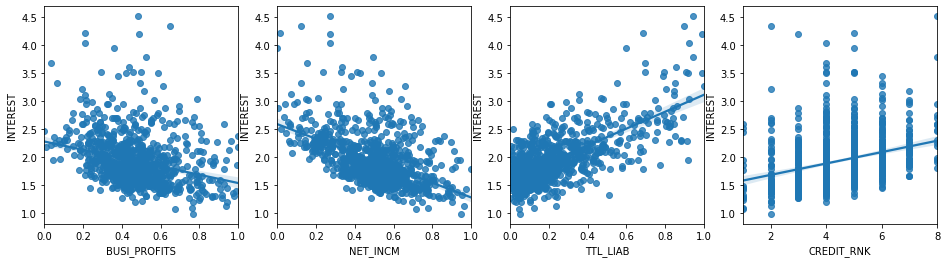

In [477]:
# 지수함수로 금리를 만들고 다시 찍어본 그래프 
# 1개 행과 4개의 열을 가진 subplots를 이용. axs는 4x1개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 4), ncols=4, nrows=1, squeeze=False)
lm_features = ['BUSI_PROFITS', 'NET_INCM', 'TTL_LIAB', 'CREDIT_RNK']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현 
    sns.regplot(x=feature, y='INTEREST', data=df3, ax=axs[row][col])

## 5-1. 학습 - 금리 


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = df3['INTEREST']
X_data = df3.drop(['INTEREST', 'LIMIT'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0: .3f}, RMSE : {1: .3F}'.format(mse, rmse))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_preds)))

MSE :  0.006, RMSE :  0.075
Variance score :  0.964


In [21]:
print('절편값 :', lr.intercept_)
print('회귀 계수값 :', np.round(lr.coef_, 1))

절편값 : 1.8907794447627233
회귀 계수값 : [ 0.1 -1.7  1.7  0.1]


In [22]:
# 회귀계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼병에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

TTL_LIAB        1.7
CREDIT_RNK      0.1
BUSI_PROFITS    0.1
NET_INCM       -1.7
dtype: float64

In [23]:
# 교차검증
from sklearn.model_selection import cross_val_score

y_target = df3['INTEREST']
X_data = df3.drop(['INTEREST'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-0.01 -0.01 -0.   -0.01 -0.01]
5 folds 의 개별 RMSE scores : [0.1  0.07 0.07 0.08 0.11]
5 folds 의 평균 RMSE : 0.084


## 5-2. 학습 - 한도

In [436]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = df4['LIMIT']
X_data = df4.drop(['INTEREST', 'LIMIT'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0: .3f}, RMSE : {1: .3F}'.format(mse, rmse))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_preds)))

MSE :  1058902616774246016.000, RMSE :  1029029939.688
Variance score :  0.171


=> 결과가 별로여서 못쓸듯 

## 6. 함수만들기

In [52]:
df2

,BUSI_PROFITS,NET_INCM,TTL_LIAB,CREDIT_RNK,INTEREST
0,-2503464690,-7860173438,79688488587,6,2.12
1,749075733,-3050740892,35885564229,5,2.82
2,-10856264040,-16460211054,53073686409,6,3.71
3,15643111979,10043081605,163407757739,5,2.34
4,2404719067,-3466383293,166348934195,6,1.59
...,...,...,...,...,...
942,12077076248,8440874428,27991148294,5,NaN
943,-832293809,-4743617836,14949035492,6,NaN
944,-3826239762,-5760304428,32373055780,5,NaN
945,3873437545,2686752710,969496543,5,NaN


In [55]:
# DB에 넣을땐 정규화된 데이터가 아닌, 원래 재무제표 데이터와 신용, 금리 테이블
df4 = df2
df4['CREDIT_RNK'] = df3['CREDIT_RNK']
df4['INTEREST'] = df3['INTEREST']
df4

,BUSI_PROFITS,NET_INCM,TTL_LIAB,CREDIT_RNK,INTEREST
0,-2503464690,-7860173438,79688488587,5,2.62
1,749075733,-3050740892,35885564229,6,2.12
2,-10856264040,-16460211054,53073686409,4,2.59
3,15643111979,10043081605,163407757739,5,2.82
4,2404719067,-3466383293,166348934195,6,3.71
...,...,...,...,...,...
942,12077076248,8440874428,27991148294,6,1.75
943,-832293809,-4743617836,14949035492,5,1.90
944,-3826239762,-5760304428,32373055780,4,1.97
945,3873437545,2686752710,969496543,3,1.42


In [46]:
df3

,BUSI_PROFITS,NET_INCM,TTL_LIAB,CREDIT_RNK,INTEREST
0,0.343798,0.323199,0.433617,5,2.62
1,0.420832,0.421135,0.195195,6,2.12
2,0.145968,0.148074,0.288751,4,2.59
3,0.773587,0.687768,0.889304,5,2.82
4,0.460045,0.412671,0.905313,6,3.71
...,...,...,...,...,...
942,0.689128,0.655142,0.152226,6,1.75
943,0.383379,0.386662,0.081237,5,1.90
944,0.312469,0.365959,0.176077,4,1.97
945,0.494831,0.537969,0.005146,3,1.42


In [57]:
# 우선 DB에 insert
db = cx_Oracle.connect("SCOTT", "tiger", "localhost:1521/orcl")
cursor = db.cursor()

for i in range(len(df4)):
    kk = df4.loc[i]
    sql_insert = "insert into MLTBL values(:a, :b, :c, :d, :e)"
    cursor.execute(sql_insert, a=kk[0], b=kk[1], c=kk[2], d=kk[3], e=kk[4])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [59]:
db.commit()
cursor.close()
db.close()

In [435]:
# 정규화 함수
def normalization(x):
    return (x-min)/(max-min)
    

In [433]:
# 회귀계수로 함수만들기
def get_interest_ML(ttl_liab, busi_profits, credit_rnk, net_incm):
    interest = 6.7 * ttl_liab + 2.1 * busi_profits + 0.1 * credit_rnk - 7.5 * net_incm + 2.786280676419162
    return interest

In [434]:
get_interest_ML(17838788472, -2848347000000, 1, -2594957000000) 

13600168682765.287

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# 레이블을 빼고 표준화할 데이터프레임 생성
df3 = df3.drop(['INTEREST', 'CREDIT_RNK'], axis=1)
scaler = MinMaxScaler(feature_range=(0,1))
df3 = scaler.fit_transform(df3)
from sklearn.preprocessing import MinMaxScaler

#transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DF로 변환
df3 = pd.DataFrame(data=df3, columns=['BUSI_PROFITS', 'NET_INCM', 'TTL_LIAB'])

# 스케일링한 df3에 레이블과 신용등급 붙이기
credit_rnk_col = df['CREDIT_RNK']
interest_col = df['INTEREST']
limit_col = df['LIMIT']
df3['CREDIT_RNK'] = credit_rnk_col
df3['INTEREST'] = interest_col
df3['LIMIT'] = limit_col



In [30]:
df3 = df3.drop(['LIMIT'], axis=1)

In [31]:
df3

,BUSI_PROFITS,NET_INCM,TTL_LIAB,CREDIT_RNK,INTEREST
0,0.343798,0.323199,0.433617,5,2.62
1,0.420832,0.421135,0.195195,6,2.12
2,0.145968,0.148074,0.288751,4,2.59
3,0.773587,0.687768,0.889304,5,2.82
4,0.460045,0.412671,0.905313,6,3.71
...,...,...,...,...,...
942,0.689128,0.655142,0.152226,6,1.75
943,0.383379,0.386662,0.081237,5,1.90
944,0.312469,0.365959,0.176077,4,1.97
945,0.494831,0.537969,0.005146,3,1.42


In [60]:
new_data = {'BUSI_PROFITS':0, 'NET_INCM':0, 'TTL_LIAB':0, 'CREDIT_RNK':0}
df4 = df3.append(new_data, ignore_index=True)
df4.tail()

,BUSI_PROFITS,NET_INCM,TTL_LIAB,CREDIT_RNK,INTEREST
943,0.383379,0.386662,0.081237,5.0,1.90
944,0.312469,0.365959,0.176077,4.0,1.97
945,0.494831,0.537969,0.005146,3.0,1.42
946,0.489795,0.562692,0.063583,4.0,1.55
947,0.000000,0.000000,0.000000,0.0,NaN


In [63]:
df4.tail(1).INTEREST

947   NaN
Name: INTEREST, dtype: float64